In [31]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import math

In [32]:
lighthouse = Image.open("lighthouse.png")
template = Image.open("template.png")

lighthouse = lighthouse.convert('L')
template = template.convert('L')
lighthouse = np.asarray(lighthouse,dtype='int64')
template = np.asarray(template,dtype='int64')

## 1.1 Gradient based detectors

In [33]:
## Kernels
kernel_x = [[0, 0, 0], 
          [-1/2, 0, 1/2],
          [0, 0, 0]]
kernel_y = [[0, -1/2, 0],
           [0, 0, 0],
           [0, 1/2, 0]]

robert_x = [[-1, 0],
            [0, 1]]
robert_y = [[0, -1],
            [1, 0]]

prewitt_x = [[-1/3, 0, 1/3],
           [-1/3, 0, 1/3],
           [-1/3, 0, 1/3]]
prewitt_y = [[-1/3, -1/3, -1/3],
           [0, 0, 0],
           [1/3, 1/3, 1/3]]

sobel_x = [[-1/4, 0, 1/4],
           [-2/4, 0, 2/4],
           [-1/4, 0, 1/4]]
sobel_y = [[-1/4, -2/4, -1/4],
           [0, 0, 0],
           [1/4, 2/4, 1/4]]

laplacian = np.array([[0,1,0],[1,-4,1],[0,1,0]])

kernel_x = np.array(kernel_x)
kernel_y = np.array(kernel_y)
robert_x = np.array(robert_x)
robert_y = np.array(robert_y)
prewitt_x = np.array(prewitt_x)
prewitt_y = np.array(prewitt_y)
sobel_x = np.array(sobel_x)
sobel_y = np.array(sobel_y)


In [56]:
#GRADIENT FUNCTION
def gradient(img,filter):
  # filter = np.array([[0,-1,0],[-1,0,1],[0,1,0]])
  img1 = np.zeros(img.shape)
  
  M,N = img.shape
  X,Y = filter.shape
  padding = int((X-1)/2)
  img2 = np.pad(img,padding,'constant',constant_values=0)
  M_1,N_1 = img2.shape
#   print(img.shape);print(img2.shape)
  for i in range(0,M_1-X+1):
    for j in range(0,N_1-Y+1):
      sum_value = 0
#       print(i,j);print('--------------/n')
      for m in range(X):
        for n in range(Y):
          sum_value+= img2[i+m,j+n]*filter[m,n]
      img1[i,j] = int(sum_value)
#   print(i,j)
  return img1



In [35]:
def mag(img,filter1,filter2,mag=None):
  img1 = gradient(img,filter1)
  img2 = gradient(img,filter2)
  M,N = img1.shape
  img3 = np.zeros(img1.shape)
#ABSOLUTE MAGNITUDE
  if mag == 'abs':
    for i in range(M):
      for j in range(N):
        img3[i,j] = np.abs(img1[i,j]) + np.abs(img2[i,j])
    return img3
#MAXIMUM MAGNITUDE
  elif mag == 'max':
    for i in range(M):
      for j in range(N):
        img3[i,j] = max(int(np.abs(img1[i,j])),int(np.abs(img2[i,j])))
      
    return img3
#SQUARED MAGNITUDE
  else:
    for i in range(M):
      for j in range(N):
        img3[i,j] = np.sqrt(img1[i,j]**2 + img2[i,j]**2)
    return img3




In [74]:
def plot(img_list,threshold):
  img_list2 = []
  for img in img_list:
    img_1 = np.zeros(img.shape)
    for i in range(img.shape[0]):
      for j in range(img.shape[1]):
        if img[i,j]<threshold:
          img_1[i,j] = 0
        else:
            img_1[i,j] = img[i,j]
    img_list2.append(img_1)    
  title_list = ['abs','max','squared']
  fig1,ax1 = plt.subplots(1,len(img_list2),sharex=True,sharey=True,figsize=(15,4))
  fig2,ax2 = plt.subplots(1,len(img_list2),sharex=True,sharey=True,figsize=(15,4))
  fig2.suptitle("Edge maps")
  for i in range(len(img_list2)):
    ax1[i].imshow(img_list[i])
    ax1[i].set_title(title_list[i])
    ax2[i].imshow(img_list2[i])
    ax2[i].set_title(title_list[i])
    
  plt.show()
    

In [37]:
gradient(lighthouse,kernel_x)

690 690


array([[  56.,   -1.,    0., ...,    1.,   36.,  -69.],
       [  55.,    0.,    0., ...,    2.,   35.,  -71.],
       [  56.,   -1.,    0., ...,    1.,   34.,  -72.],
       ...,
       [ 104.,   -1.,   -2., ...,    0.,   14., -103.],
       [ 127.,    0.,    0., ...,    0.,    0., -127.],
       [ 127.,    0.,    0., ...,    0.,    0., -127.]])

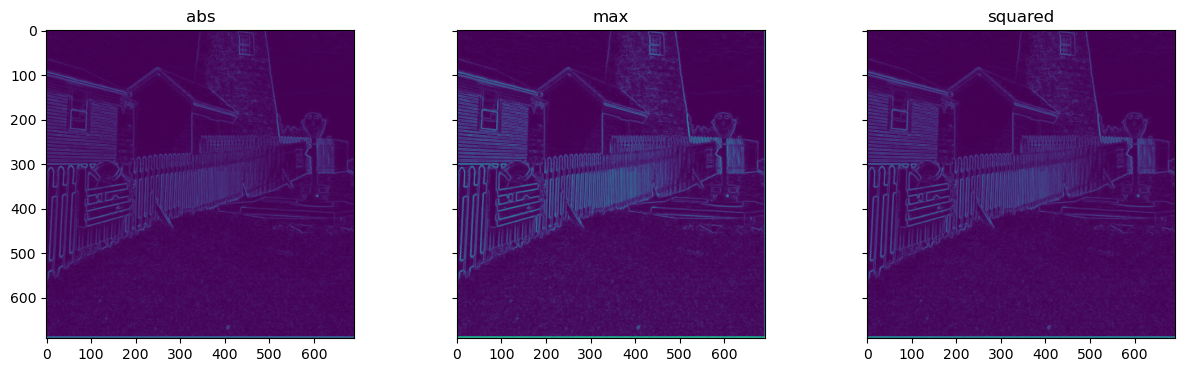

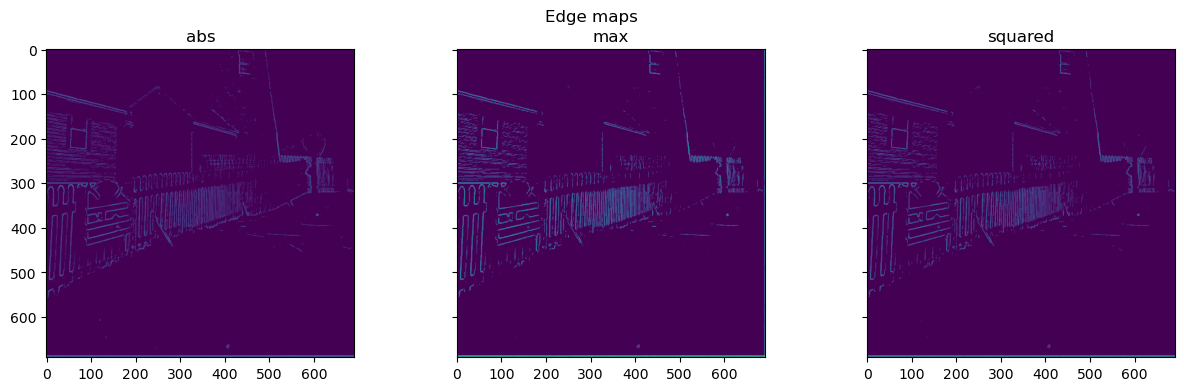

In [75]:
#Centered 
centered_img_abs = mag(lighthouse,kernel_x,kernel_y,'abs')
centered_img_max = mag(lighthouse,kernel_x,kernel_y,'max')
centered_img_sq = mag(lighthouse,kernel_x,kernel_y)

centered = [centered_img_abs,centered_img_max,centered_img_sq]
plot(centered,30)

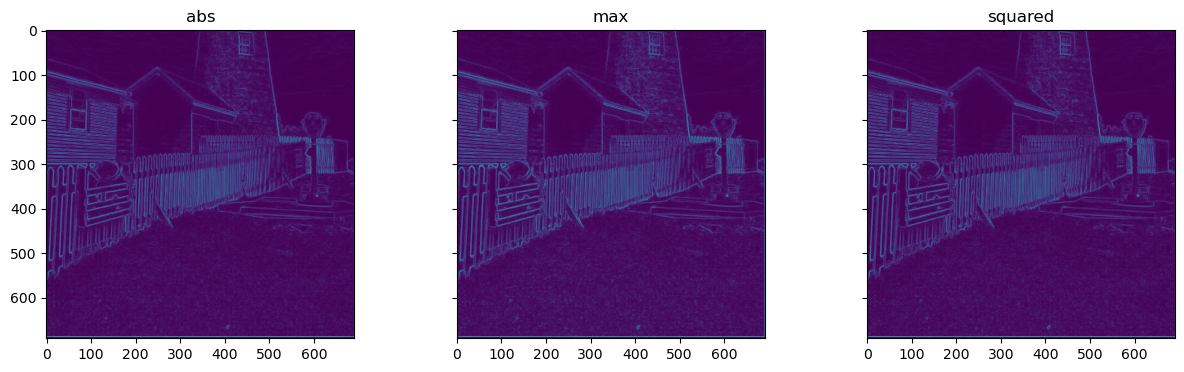

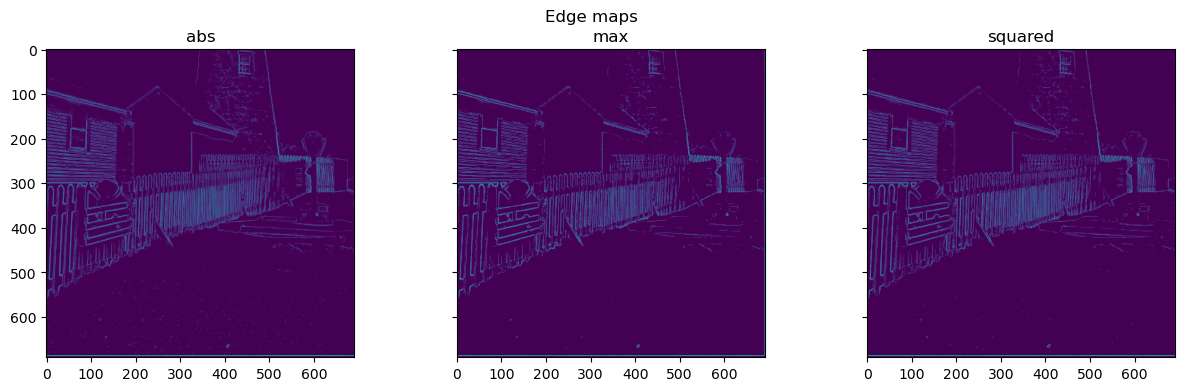

In [79]:
#Roberts
roberts_img_abs = mag(lighthouse,robert_x,robert_y,'abs')
roberts_img_max = mag(lighthouse,robert_x,robert_y,'max')
roberts_img_sq = mag(lighthouse,robert_x,robert_y)
roberts = [roberts_img_abs,roberts_img_max,roberts_img_sq]
plot(roberts,30)

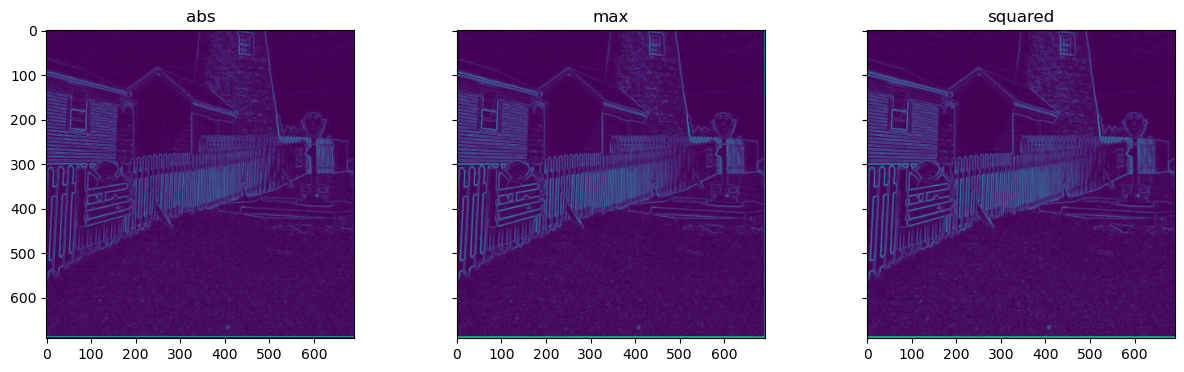

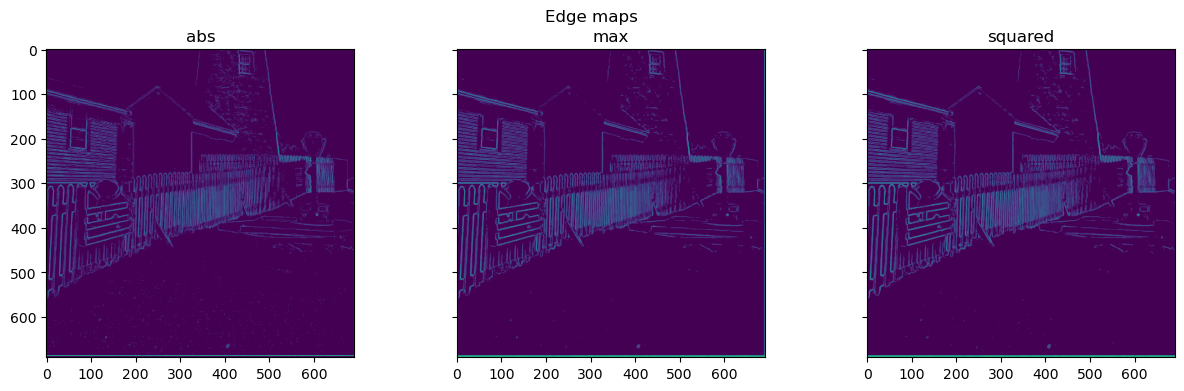

In [80]:
#Prewitt
prewitt_img_abs = mag(lighthouse,robert_x,robert_y,'abs')
prewitt_img_max = mag(lighthouse,prewitt_x,prewitt_y,'max')
prewitt_img_sq = mag(lighthouse,prewitt_x,prewitt_y)
prewitt = [prewitt_img_abs,prewitt_img_max,prewitt_img_sq]
plot(prewitt,30)


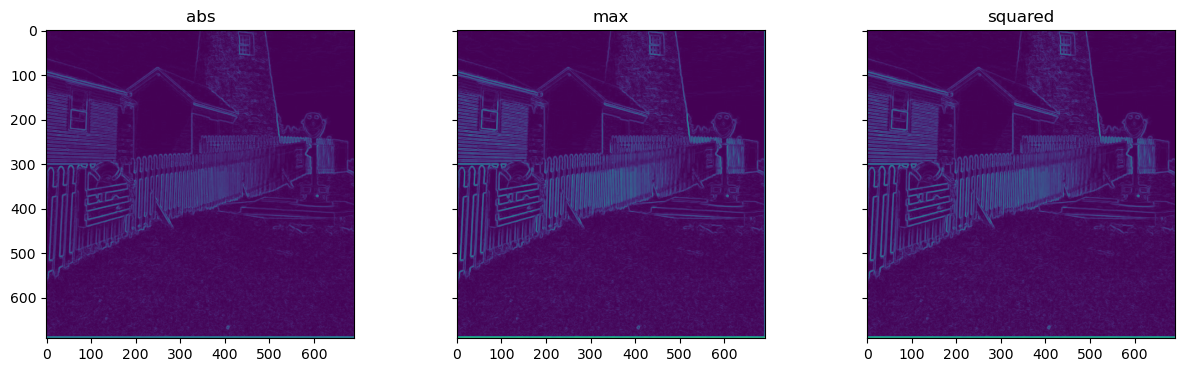

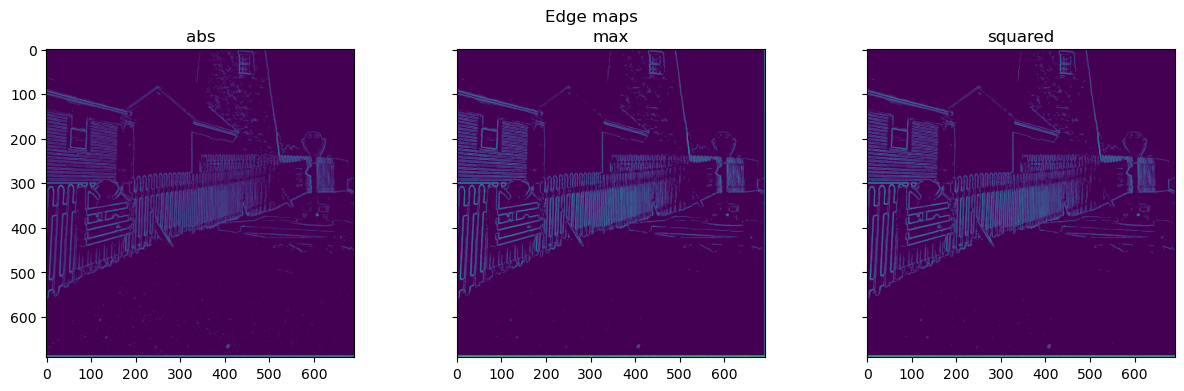

In [81]:
#Sobel
sobel_img_abs = mag(lighthouse,sobel_x,sobel_y,'abs')
sobel_img_max = mag(lighthouse,sobel_x,sobel_y,'max')
sobel_img_sq = mag(lighthouse,sobel_x,sobel_y)
sobel = [sobel_img_abs,sobel_img_max,sobel_img_sq]
plot(sobel,30)

### 1.2 Laplacian

In [42]:
laplacian_arr = gradient(lighthouse,laplacian)

690 690


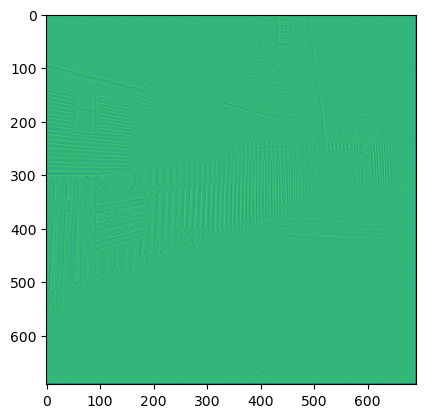

In [43]:
plt.imshow(laplacian_arr)

In [44]:
def ZC(img):
    M,N = img.shape
    img2 = np.pad(img,(1,1),'constant',constant_values=(0,0))
    img3 = np.zeros(img.shape)
    sign = lambda x:math.copysign(1,x)
    indexes = []
    for i in range(1,M-1):
        for j in range(1,N-1):
            if sign(img2[i,j-1]) != sign(img2[i,j+1]) or (img2[i-1,j]) != sign(img2[i+1,j]):
                img3[i,j] = img[i,j]
    return img3

In [45]:
zc_laplacian = ZC(laplacian_arr)

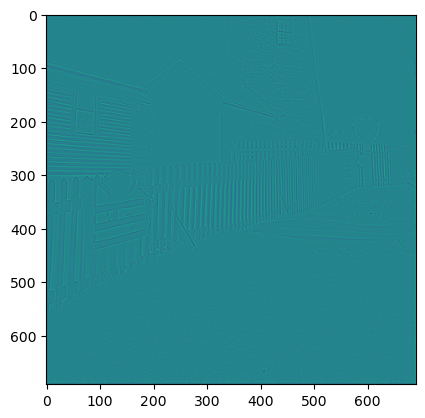

In [46]:
plt.imshow(zc_laplacian)

### 1.3 LOG

In [52]:
def pad_image(img,size):
  M,N = img.shape
  pad_img = np.zeros((M+size-1,N+size-1))
  pad_img[int((size-1)/2):int(M+size-1-(size-1)/2),int((size-1)/2):int(N+size-1-(size-1)/2)] = img
  return pad_img

In [53]:
#Gaussian filter
def LOG(img,laplacian_filter,deviation):
  window_size = 5
  img1 = pad_image(img,window_size)
  scale = int((window_size-1)/2)
  img2 = np.zeros(img.shape)
  filter = np.random.normal(0,deviation,(window_size,window_size))
  for i in range(scale,img1.shape[0]-scale):
    for j in range(scale,img1.shape[1]-scale):
      sum_filter = 0
      for m in range(window_size):
        for n in range(window_size):
          sum_filter += img1[i-scale+m,j-scale+n]*filter[m,n]
      img2[i-scale,j-scale] = sum_filter
  return gradient(img2,laplacian_filter)

In [54]:
noise = np.random.normal(0,10,lighthouse.shape)
image = lighthouse + noise

### Gradient based plots

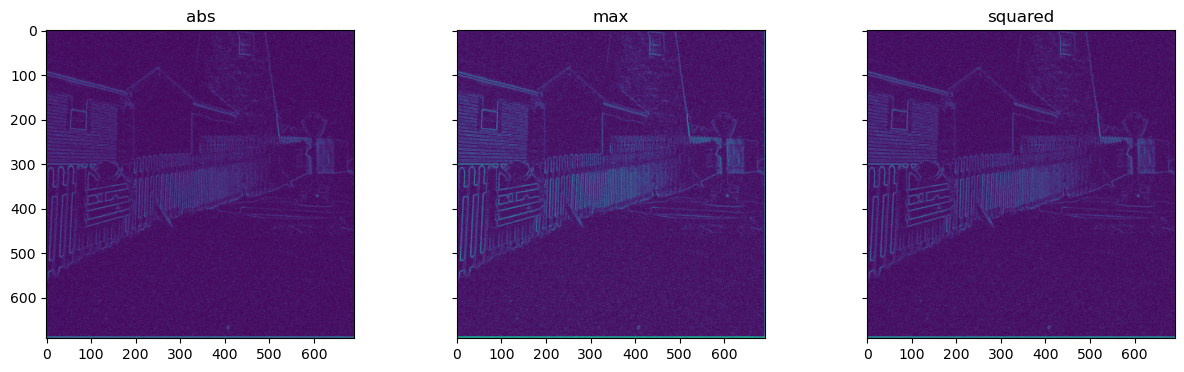

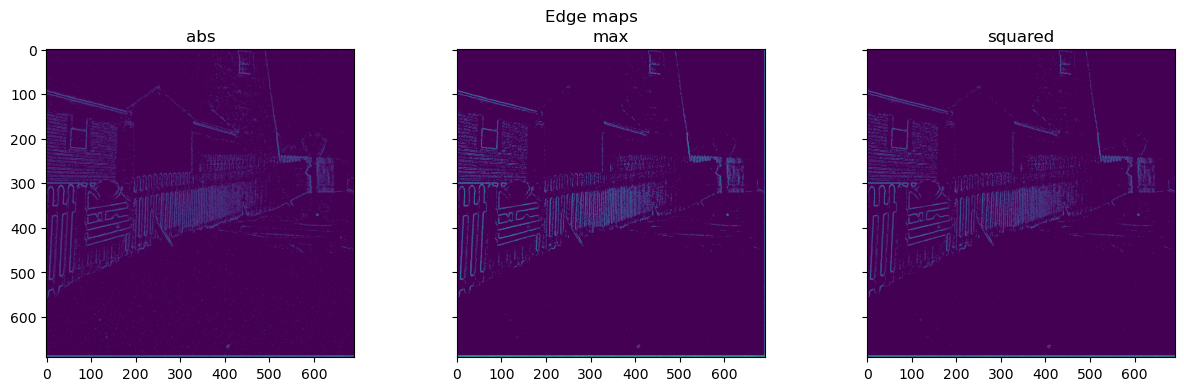

In [82]:
#Centered 
centered_img_abs = mag(image,kernel_x,kernel_y,'abs')
centered_img_max = mag(image,kernel_x,kernel_y,'max')
centered_img_sq = mag(image,kernel_x,kernel_y)

centered = [centered_img_abs,centered_img_max,centered_img_sq]
plot(centered,30)

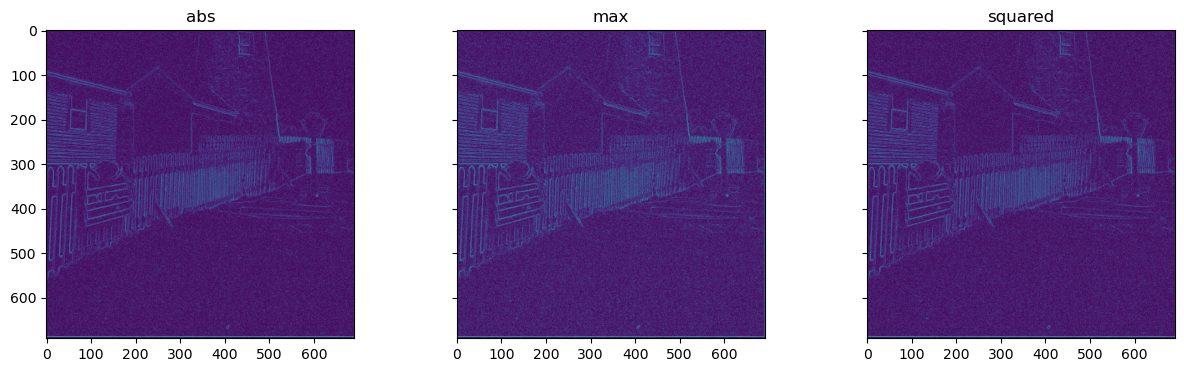

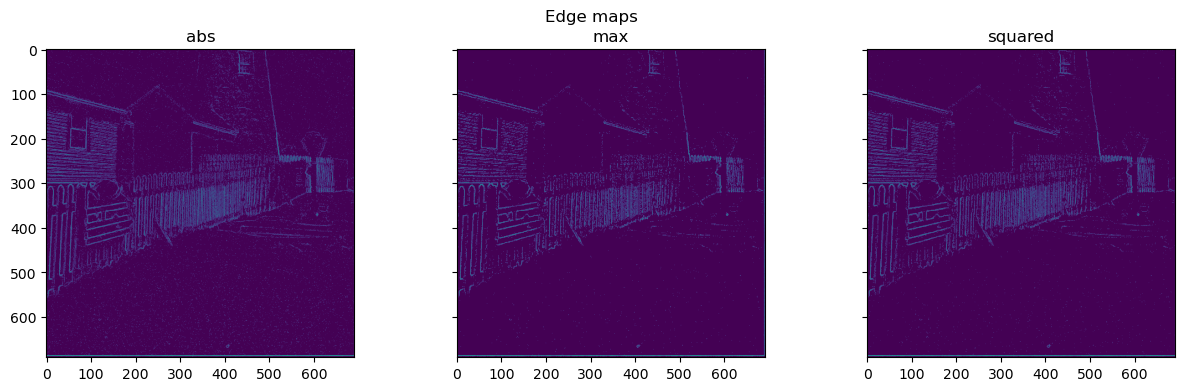

In [86]:
#Roberts
roberts_img_abs = mag(image,robert_x,robert_y,'abs')
roberts_img_max = mag(image,robert_x,robert_y,'max')
roberts_img_sq = mag(image,robert_x,robert_y)
roberts = [roberts_img_abs,roberts_img_max,roberts_img_sq]
plot(roberts,50)

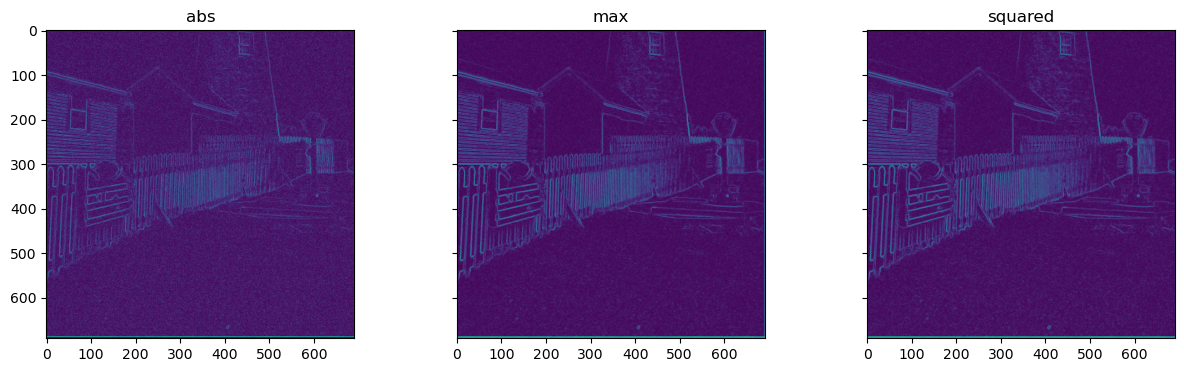

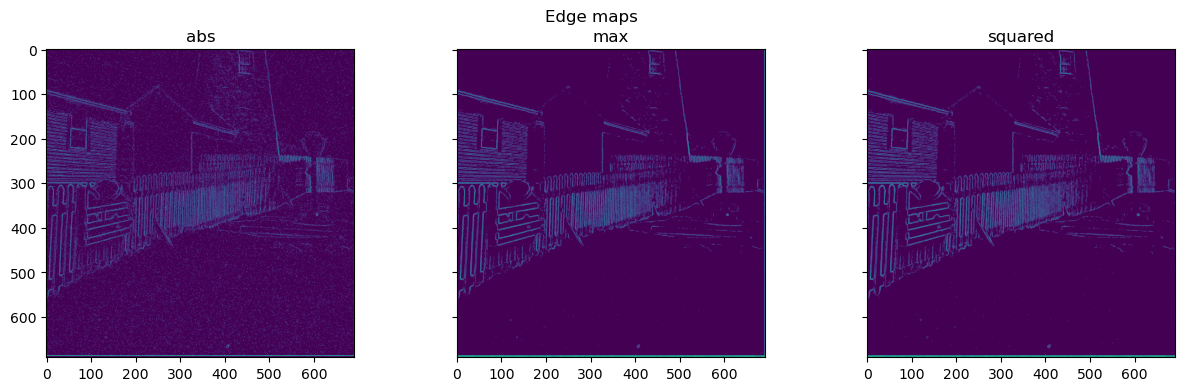

In [90]:
#Prewitt
prewitt_img_abs = mag(image,robert_x,robert_y,'abs')
prewitt_img_max = mag(image,prewitt_x,prewitt_y,'max')
prewitt_img_sq = mag(image,prewitt_x,prewitt_y)
prewitt = [prewitt_img_abs,prewitt_img_max,prewitt_img_sq]
plot(prewitt,40)


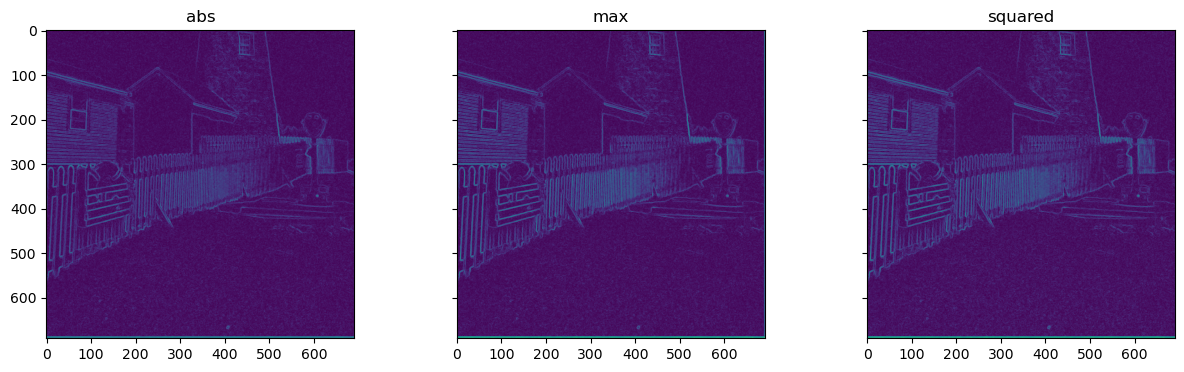

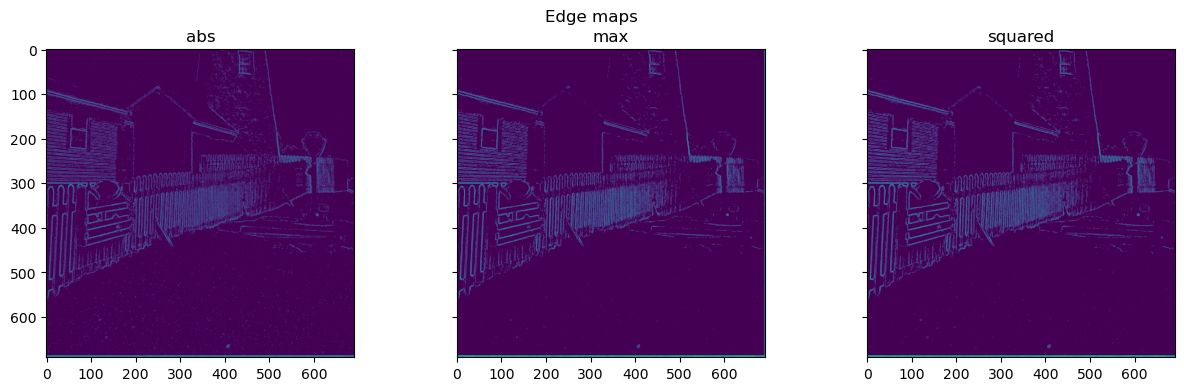

In [89]:
#Sobel
sobel_img_abs = mag(image,sobel_x,sobel_y,'abs')
sobel_img_max = mag(image,sobel_x,sobel_y,'max')
sobel_img_sq = mag(image,sobel_x,sobel_y)
sobel = [sobel_img_abs,sobel_img_max,sobel_img_sq]
plot(sobel,40)

### LOG Plots

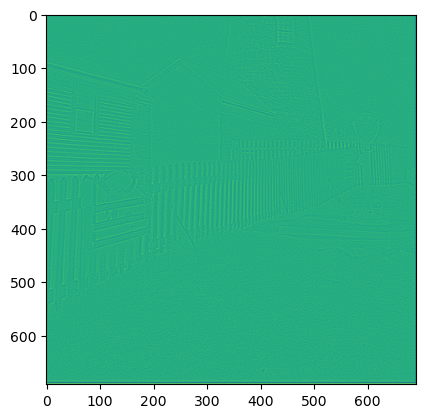

In [60]:
plt.imshow(ZC(LOG(image,laplacian,1)))

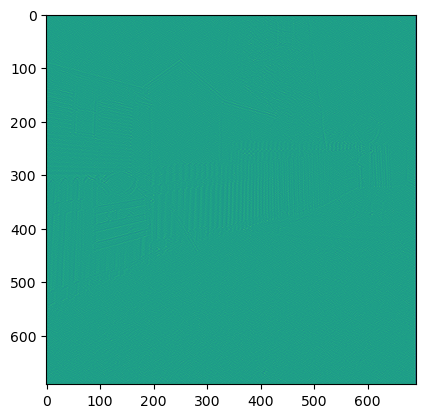

In [61]:
plt.imshow(ZC(LOG(image,laplacian,5)))

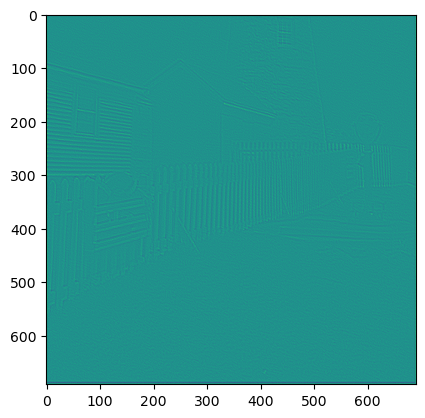

In [62]:
plt.imshow(ZC(LOG(image,laplacian,10)))

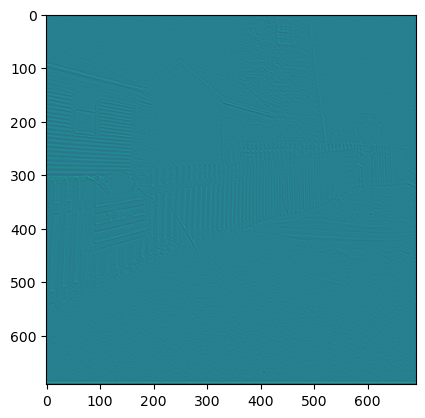

In [92]:
plt.imshow(ZC(LOG(image,laplacian,15)))

### The LOG Filter edge map is much more clean and distinct all over the image compared to the gradient based plots

## 2. Template matching

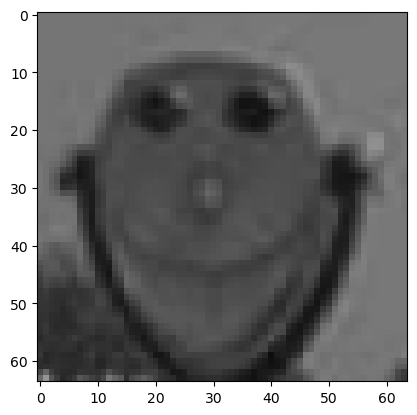

In [16]:
plt.imshow(template)

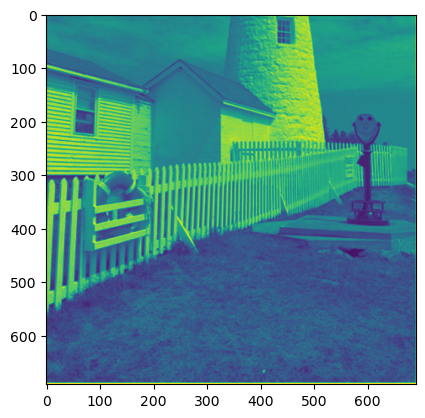

In [17]:
plt.imshow(lighthouse)

In [93]:
# NORMALIZED CROSS CORRELATION FUNCTION
def cross_corr(img,filter_arr):
    cross_corr_arr = np.zeros(img.shape) 
    M,N = img.shape
    X,Y = filter_arr.shape
    K,L = int(X/2),int(X/2)-1
    img2 = np.pad(img,(L,K),'constant',constant_values=(0,0))
    M_1,N_1 = img2.shape
#     print(img2.shape)
    sum_template = np.sum(filter_arr**2)
    for i in range(0,M_1-X+1):
        for j in range(0,N_1-Y+1):
            window = img2[i:i+X,j:j+Y]
            sum_img = np.sum(np.square(window))
            sum_cross = np.sum(np.multiply(window,filter_arr))
#                     sum_img += img2[i+m,j+n]**2
            cross_corr_arr[i,j] = sum_cross/np.sqrt(sum_img*sum_template)
#     print(i,j)
    return cross_corr_arr
      

In [94]:
cca = cross_corr(lighthouse,template)

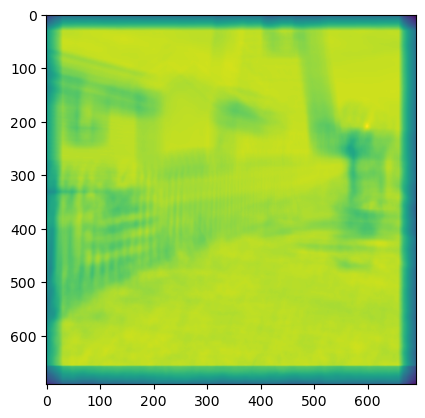

In [95]:
plt.imshow(cca)

In [96]:
threshold = 0.81
cca_arr = np.where(cca<=threshold,cca,0)

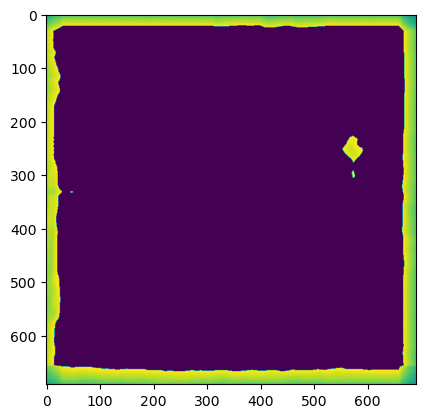

In [97]:
plt.imshow(cca_arr)

In [99]:
def list_cca(img,filter_1):
    sigma = [1,3,5,10]
    list_c = []
    fig1,ax1 = plt.subplots(1,4,sharex=True,sharey=True,figsize=(15,4))
#     fig2,ax2 = plt.subplots(1,4,sharex=True,sharey=True,figsize=(15,4))
    for i in range(len(sigma)):
        gaussian = np.random.normal(mean,sigma[i],size=filter_1.shape)
        min_value = np.min(gaussian)
        gaussian = gaussian + min_value
        template_1 = filter_1 + gaussian
        list_c.append(cross_corr(img,template_1))
        ax1[i].imshow(template_1)
#         ax2[i].imshow(cca_1)
    return list_c

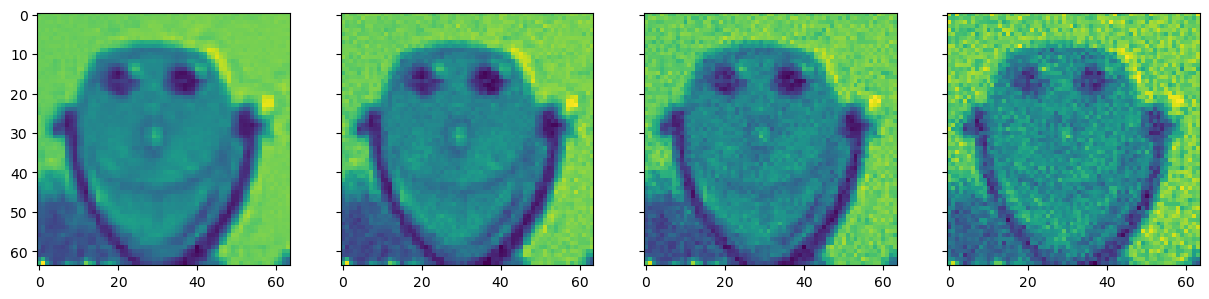

In [100]:
cca_list = list_cca(lighthouse,template)

In [22]:
def plot_cca(list_arr,threshold):
    fig,ax = plt.subplots(1,len(list_arr),figsize=(15,4))
    for i in range(len(list_arr)):
        arr = np.where(list_arr[i]<=threshold,list_arr[i],0)
        ax[i].imshow(arr)
    plt.show()
        

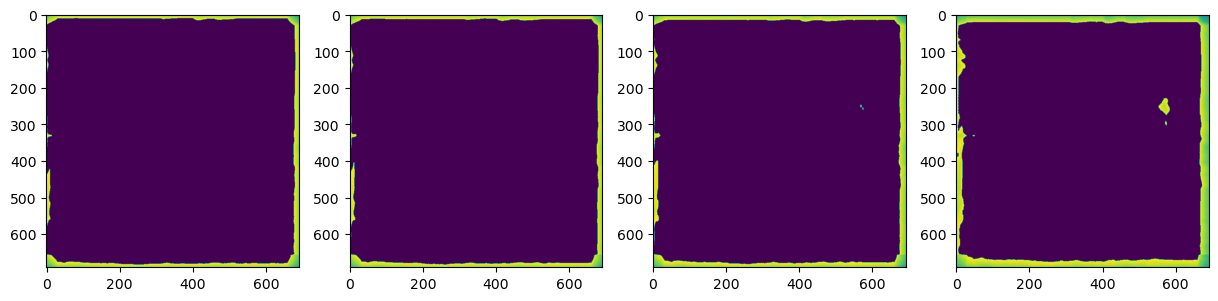

In [175]:
#Threshold = 0.7; 4 Plots correspond to cross correlation output from 4 templates with increasing gaussian noise
plot_cca(cca_list,0.7)

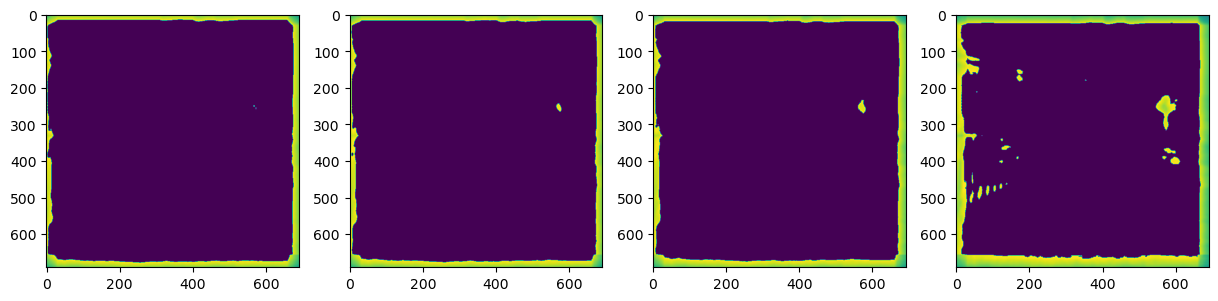

In [176]:
#Threshold = 0.7; 4 Plots correspond to cross correlation output from 4 templates with increasing gaussian noise
plot_cca(cca_list,0.74)

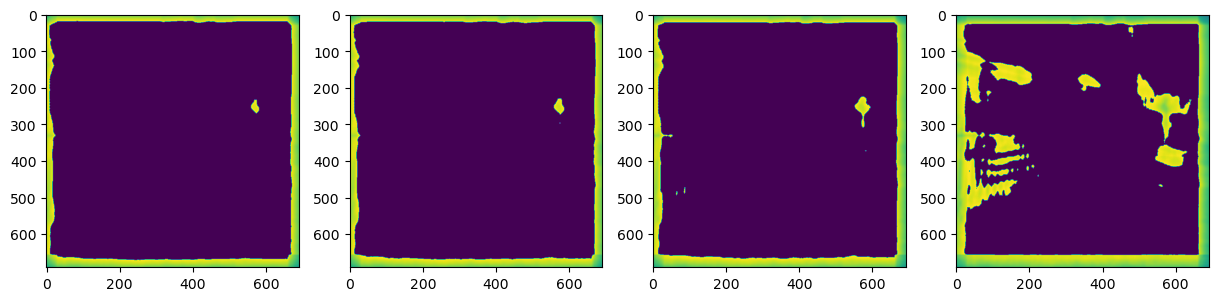

In [177]:
#Threshold = 0.7; 4 Plots correspond to cross correlation output from 4 templates with increasing gaussian noise
plot_cca(cca_list,0.78)

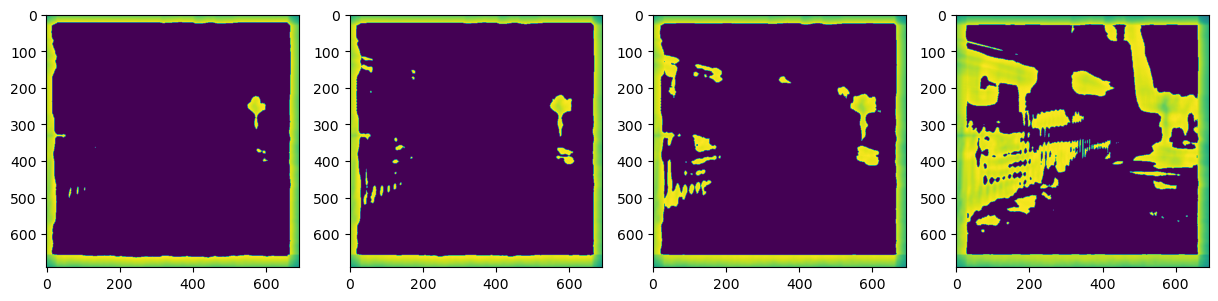

In [178]:
#Threshold = 0.7; 4 Plots correspond to cross correlation output from 4 templates with increasing gaussian noise
plot_cca(cca_list,0.82)

### As the template noise is increased more and more areas get high correlation scores

In [15]:
def rotate_image(img,ang):
    angle = np.radians(ang)
    rotation_matrix = np.array([[np.cos(angle),np.sin(angle)],[-np.sin(angle),np.cos(angle)]])
    img2 = np.zeros(img.shape)
    M,N = img.shape
    for i in range(M):
        for j in range(N):
            old_xy = np.array([i,j])
            new_xy = np.matmul(rotation_matrix,old_xy)
            new_x,new_y = new_xy.astype(int)
            if 0<=new_x<M and 0<=new_y<N:
                img2[new_x,new_y] = img[i,j]
    return img2

In [21]:
theta = [5,10,15]
list_cor = []
for i in range(len(theta)):
    img = rotate_image(lighthouse,theta[i])
    list_cor.append(cross_corr(img,template))
    

(754, 754)


/tmp/ipykernel_89567/747356398.py:16: RuntimeWarning: invalid value encountered in double_scalars
  cross_corr_arr[i,j] = sum_cross/np.sqrt(sum_img*sum_template)


690 690
(754, 754)
690 690
(754, 754)
690 690


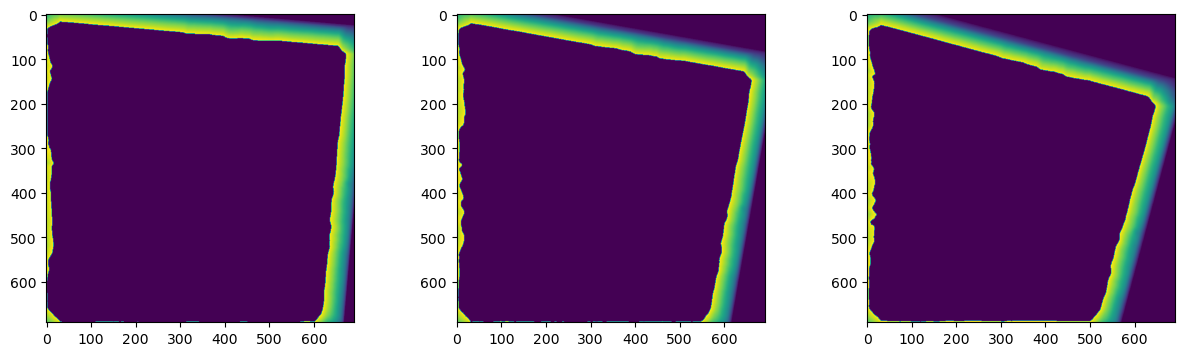

In [25]:
plot_cca(list_cor,0.7)

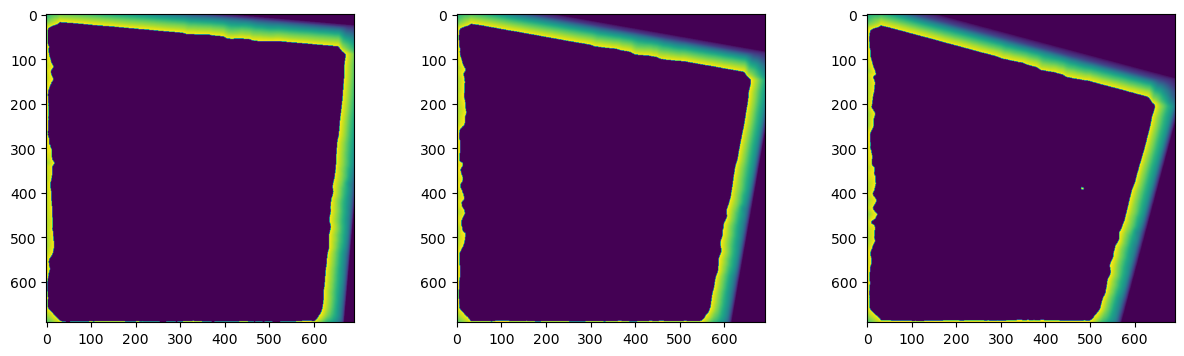

In [26]:
plot_cca(list_cor,0.74)

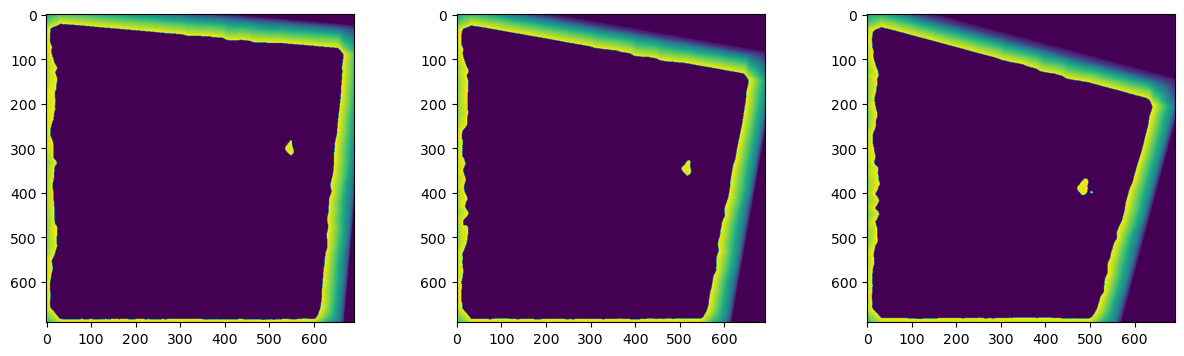

In [27]:
plot_cca(list_cor,0.78)

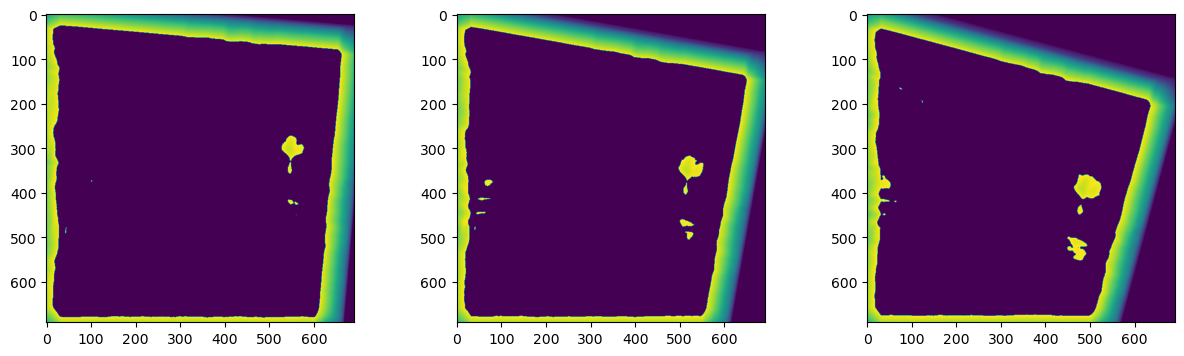

In [29]:
plot_cca(list_cor,0.82)

### As the image is rotated the correlation score shows correlation in different parts of the image even is there is no correlation for the respected template.